<a href="https://colab.research.google.com/github/prajwal714/Machine-Learning-Lab/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

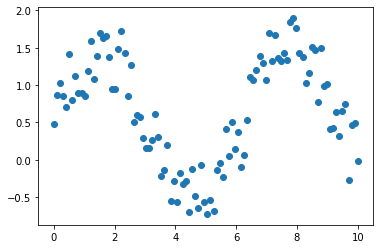

Score --> 0.2442953976384604
Mean Squared Error --> 0.382835515342689
[[ 0.         -1.04650398  0.20954302 -0.01160472]] [1.81477276]
Score --> 0.24370282116331476
Mean Squared Error --> 0.3831357111063954
[[ 0.         -0.98837884  0.19640338 -0.01078687]] [1.75781972]
Score --> 0.0284823332870362
Mean Squared Error --> 0.4921651468554205
[ 0.         -0.         -0.00453579  0.0007906 ] [0.62412309]
Score --> 0.08304370891884794
Mean Squared Error --> 0.4645246742520559
[ 0.         -0.09046501 -0.0015559   0.00132729] [0.84108784]
Sum of Squares of Polynomial Regression without Regularization is--> 3.2934001626523317
Sum of Squares of Polynomial Regression with Ridge Regularization(L2 Penalty) is --> 3.0899301534597603
Sum of Squares of Polynomial Regression with Lasso Regularization(L1 Penalty) is --> 0.38955082959193515
Sum of Squares of Polynomial Regression with ElasticNetRegularization (L1 + L2 Penalty) is --> 0.715616859713158


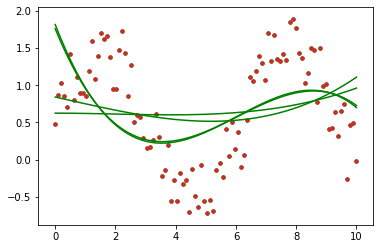

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x_values = np.linspace(0, 10, 100)
y_values = np.sin(x_values) + np.random.uniform(0, 1, 100)
plt.scatter(x_values, y_values)
plt.show()
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
x_values = x_values[:, np.newaxis]
y_values = y_values[:, np.newaxis]


#Polynomial Regression without regularization
polynomial_features = PolynomialFeatures(degree=3)
x_poly=polynomial_features.fit_transform(x_values)
model = LinearRegression()
model.fit(x_poly, y_values)
y_poly_pred = model.predict(x_poly)
plt.scatter(x_values, y_values, s=10)
plt.plot(x_values, y_poly_pred, color='g')
print("Score --> {}".format(model.score(x_poly, y_values)))
print("Mean Squared Error --> {}".format(mean_squared_error(y_values,
y_poly_pred)))
coef_normal = model.coef_
intercept_normal = model.intercept_
print(coef_normal, intercept_normal)


#Ridge Regression
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.5)
clf.fit(x_poly, y_values)
y_poly_pred = clf.predict(x_poly)
plt.scatter(x_values, y_values, s=10)
plt.plot(x_values, y_poly_pred, color='g')
score = clf.score(x_poly, y_values)
print("Score --> {}".format(clf.score(x_poly, y_values)))
print("Mean Squared Error --> {}".format(mean_squared_error(y_values,
y_poly_pred)))
coef_ridge = clf.coef_
intercept_ridge = clf.intercept_
print(coef_ridge, intercept_ridge)

#Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5)
clf.fit(x_poly, y_values)
y_poly_pred = clf.predict(x_poly)
plt.scatter(x_values, y_values, s=10)
plt.plot(x_values, y_poly_pred, color='g')
score = clf.score(x_poly, y_values)
print("Score --> {}".format(clf.score(x_poly, y_values)))
print("Mean Squared Error --> {}".format(mean_squared_error(y_values,
y_poly_pred)))
coef_lasso = clf.coef_
intercept_lasso = clf.intercept_
print(coef_lasso, intercept_lasso)

#ElasticNet Regression
from sklearn import linear_model
clf = linear_model.ElasticNet(alpha=0.2, l1_ratio=0.5)
clf.fit(x_poly, y_values)
y_poly_pred = clf.predict(x_poly)
plt.scatter(x_values, y_values, s=10)
plt.plot(x_values, y_poly_pred, color='g')
score = clf.score(x_poly, y_values)
print("Score --> {}".format(clf.score(x_poly, y_values)))
print("Mean Squared Error --> {}".format(mean_squared_error(y_values,
y_poly_pred)))
coef_elastic = clf.coef_
intercept_elastic = clf.intercept_
print(coef_elastic, intercept_elastic)

#Sum of Squares
def sum_square(intercept, coef):
  ans = intercept[0] * intercept[0]
  for i in range(1, len(coef)):
    ans += coef[i] * coef[i]
  return ans
normal = sum_square(intercept_normal, coef_normal)
lasso = sum_square(intercept_lasso, coef_lasso)
ridge = sum_square(intercept_ridge, coef_ridge)
elastic = sum_square(intercept_elastic, coef_elastic)

print('Sum of Squares of Polynomial Regression without Regularization is-->', normal)
print('Sum of Squares of Polynomial Regression with Ridge Regularization(L2 Penalty) is -->', ridge)
print('Sum of Squares of Polynomial Regression with Lasso Regularization(L1 Penalty) is -->', lasso)
print('Sum of Squares of Polynomial Regression with ElasticNetRegularization (L1 + L2 Penalty) is -->', elastic)
